<a href="https://colab.research.google.com/github/tansexe/AD-Lab/blob/main/LAB_9_Sessional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation and Analysis Libraries
import numpy as np   # For numerical operations
import pandas as pd  # For data manipulation

# Neural Network Libraries
import tensorflow as tf                  # TensorFlow framework
from tensorflow.keras import layers, models
import keras                             # High-level neural network API
from keras.datasets import fashion_mnist # Fashion MNIST dataset
from keras.utils import to_categorical   # Utility to convert labels to one-hot encoding
from keras.models import Sequential      # Linear stack of neural network layers
from keras.layers import Dense, Flatten             # Dense layers and flattening tool # Changed import to be from keras.layers directly
from keras.layers import Conv2D, MaxPooling2D  # Convolutional and pooling layers # Changed import to be from keras.layers directly

# Visualization Libraries
import matplotlib.pyplot as plt  # For plotting and visualization

# Model Evaluation Libraries
from sklearn.metrics import accuracy_score  # Accuracy metric for model evaluation

# TensorFlow Utility for Device Information
from tensorflow.python.client import device_lib  # Fetch device-specific details

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Check the dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


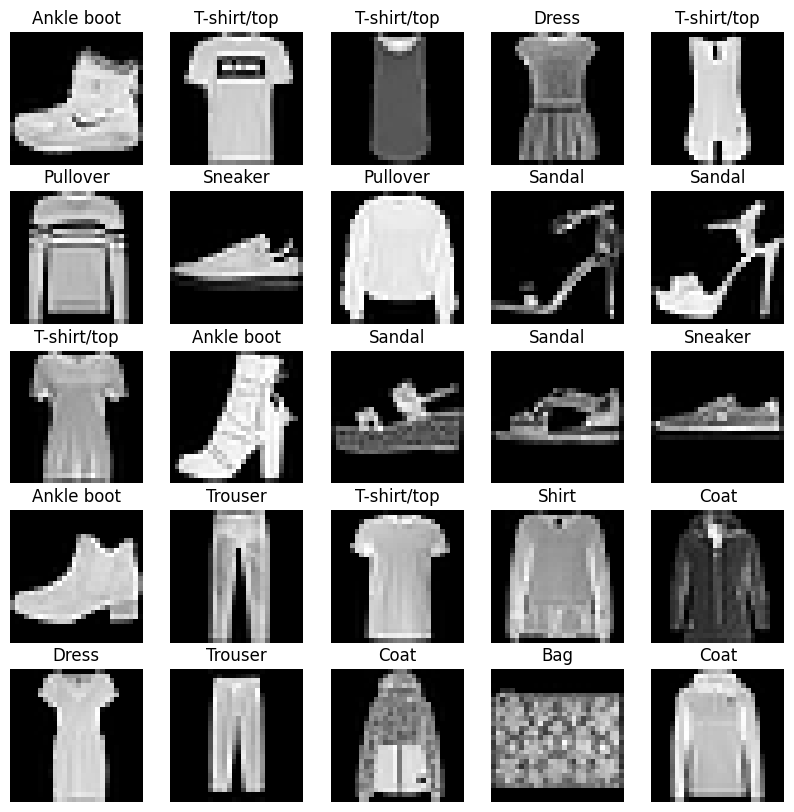

In [ ]:
# Define class names for reference (Fashion MNIST class names)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the image arrays
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [ ]:
# Define the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Expand the dimensions of the input data to match the CNN input shape
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Train the CNN model
history = model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.2)

# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7546 - loss: 0.6790 - val_accuracy: 0.8637 - val_loss: 0.3678
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 30ms/step - accuracy: 0.8790 - loss: 0.3338 - val_accuracy: 0.8922 - val_loss: 0.2994
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.8948 - loss: 0.2817 - val_accuracy: 0.8893 - val_loss: 0.2945
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9061 - loss: 0.2512 - val_accuracy: 0.8942 - val_loss: 0.2819
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9186 - loss: 0.2187 - val_accuracy: 0.8945 - val_loss: 0.2786
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9269 - loss: 0.1976 - val_accuracy: 0.9017 - val_loss: 0.2617
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9350 - loss: 0.1736 - val_accuracy: 0.9101 - val_loss: 0.2512
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9429 -

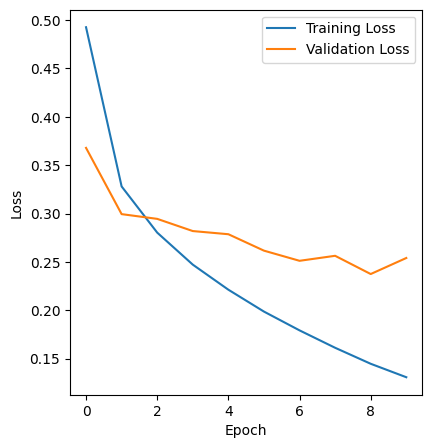

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

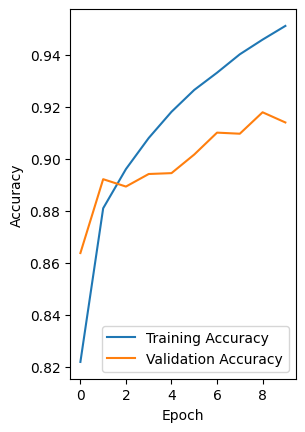

In [ ]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


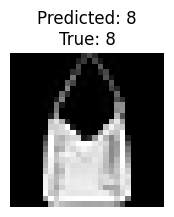

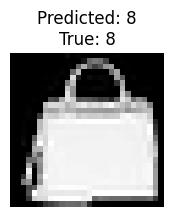

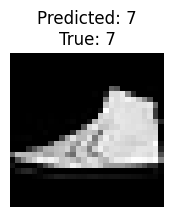

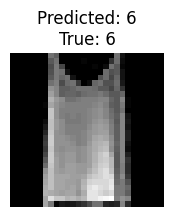

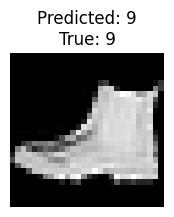

In [ ]:
# Randomly select a few test samples
sample_indices = np.random.choice(len(x_test_cnn), size=5, replace=False)
sample_images = x_test_cnn[sample_indices]

# Make predictions
predictions = model.predict(sample_images)

# Display the predictions and true labels
for i in range(len(sample_indices)):
    plt.figure(figsize=(2, 2))
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {y_test[sample_indices[i]]}")
    plt.axis('off')
    plt.show()

In [ ]:
# Save the trained model
model.save('fashion_mnist_cnn_model.h5')